In [1]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('../data/Fraud_Data.csv')
except FileNotFoundError:
    print("Error: Dataset file not found. Make sure it's in the data/ folder.")

In [2]:
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [3]:
# --- Data Card Requirements  ---

# 1. Confirm exact row count
print(f"Total number of transaction records: {len(df)}")

Total number of transaction records: 151112


In [4]:
# 2. Confirm fraud ratio
target_col = 'class' 
fraud_ratio = df[target_col].mean()
print(f"Fraud ratio: {fraud_ratio:.2%}")

Fraud ratio: 9.36%


In [5]:
# 3. Confirm time span
# parsing 'signup_time' and 'purchase_time'
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
df['signup_time'] = pd.to_datetime(df['signup_time'])

print(f"Dataset time span (purchase_time):")
print(f"  From: {df['purchase_time'].min()}")
print(f"  To:   {df['purchase_time'].max()}")

Dataset time span (purchase_time):
  From: 2015-01-01 00:00:44
  To:   2015-12-16 02:56:05


In [6]:
# 4. Document high-cardinality ID distributions 
id_cols = ['user_id', 'device_id', 'ip_address']
for col in id_cols:
    unique_count = df[col].nunique()
    print(f"Unique values in '{col}': {unique_count}")

Unique values in 'user_id': 151112
Unique values in 'device_id': 137956
Unique values in 'ip_address': 143512


In [7]:
# 5. Verify no features leak post-transaction information 
print(f"\nColumn names: {df.columns.tolist()}")


Column names: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']


In [8]:
# --- Task 2: Data Quality & EDA ---

# 1. Schema Validation: Check data types
print("--- Data Types ---")
print(df.dtypes)

# 1b. Schema Validation: Check for missing values
print("\n--- Missing Values (Count) ---")
print(df.isnull().sum())

--- Data Types ---
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

--- Missing Values (Count) ---
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [9]:
# 2. Temporal Integrity Check
temporal_violations = df[df['purchase_time'] < df['signup_time']].shape[0]

if temporal_violations > 0:
    print(f"\n--- Temporal Integrity Warning ---")
    print(f"Found {temporal_violations} records where purchase_time < signup_time.")
else:
    print("\n--- Temporal Integrity Check ---")
    print("All records passed. (purchase_time >= signup_time)")


--- Temporal Integrity Check ---
All records passed. (purchase_time >= signup_time)


In [10]:
# 3. Missing Data Quantification
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\n--- Missing Values (Percentage) ---")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


--- Missing Values (Percentage) ---
Series([], dtype: float64)


In [11]:
# 4. Outlier Detection
print("\n--- Purchase Value Statistics ---")
print(df['purchase_value'].describe())


--- Purchase Value Statistics ---
count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64


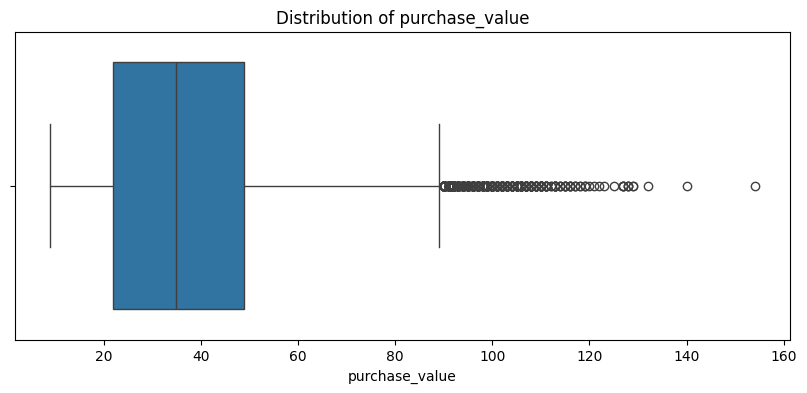

In [12]:
# visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['purchase_value'])
plt.title('Distribution of purchase_value')
plt.show()

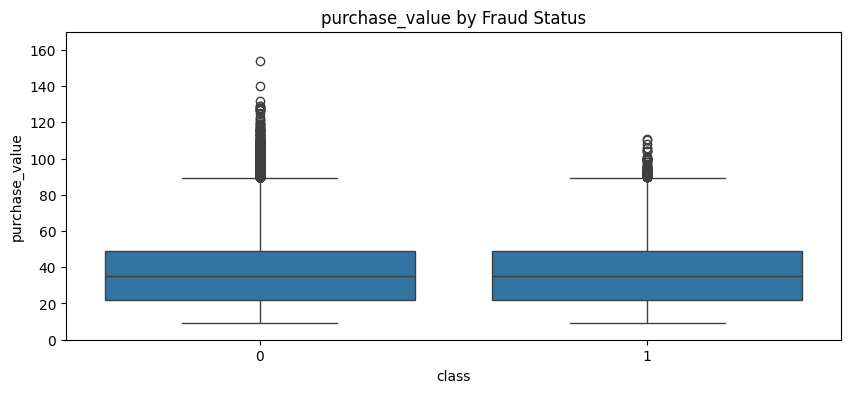

In [13]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df[target_col], y=df['purchase_value'])
plt.title('purchase_value by Fraud Status')
plt.ylim(0, 170)
plt.show()

In [14]:
# 5. Class Balance
print("\n--- Class Balance Check ---")
print(df[target_col].value_counts(normalize=True))


--- Class Balance Check ---
class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


In [15]:
# --- Task 3: Test Feature Engineering Script ---
import sys
import os
import pandas as pd
import importlib  # <-- 1. Import the library

# This adds the 'src' folder to our Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# --- This is the new, robust way ---
import feature_engineering  # <-- 2. Import the module itself
importlib.reload(feature_engineering)  # <-- 3. Force-reload it
from feature_engineering import create_features  # <-- 4. Now import the function

# Reload the original, raw dataframe
try:
    df_raw = pd.read_csv('../data/Fraud_Data.csv')
except FileNotFoundError:
    print("Error: Dataset file not found.")

# Create features
df_features = create_features(df_raw)

Computed 'account_age_minutes'.
Computing velocity metrics...
  Grouping by device_id...
Calculating for window 1h...
Calculating for window 24h...
  Grouping by ip_address...
Calculating for window 1h...
Calculating for window 24h...
Velocity metrics computed.
Computing rarity signals...
  Grouping by device_id for 7d...
  Grouping by ip_address for 7d...
Rarity signals computed.
Computing amount normalization (Z-score) for user_id over 30d...
Amount normalization computed.
Feature engineering complete.


In [16]:
# Check the new feature
print("\n--- Feature Check: account_age_minutes ---")
print(df_features[['purchase_time', 'signup_time', 'account_age_minutes']].head())
print(df_features['account_age_minutes'].describe())


--- Feature Check: account_age_minutes ---
        purchase_time         signup_time  account_age_minutes
0 2015-01-01 00:00:44 2015-01-01 00:00:43             0.016667
1 2015-01-01 00:00:45 2015-01-01 00:00:44             0.016667
2 2015-01-01 00:00:46 2015-01-01 00:00:45             0.016667
3 2015-01-01 00:00:47 2015-01-01 00:00:46             0.016667
4 2015-01-01 00:00:48 2015-01-01 00:00:47             0.016667
count    151112.000000
mean      82200.487477
std       52104.385307
min           0.016667
25%       36445.891667
50%       82105.758333
75%      127408.741667
max      172799.533333
Name: account_age_minutes, dtype: float64


In [17]:
# --- Check Velocity Features ---
print("\n--- Feature Check: Velocity Metrics ---")

# Let's find a device_id that has multiple transactions
test_device_id = df_features['device_id'].value_counts().idxmax()
print(f"Inspecting transactions for a busy device: {test_device_id}")

# Show the relevant columns for that device, sorted by time
cols_to_show = [
    'purchase_time', 
    'device_id', 
    'purchase_value', 
    'velocity_device_id_count_1h', 
    'velocity_device_id_amount_1h',
    'velocity_device_id_count_24h'
]
print(df_features[df_features['device_id'] == test_device_id][cols_to_show].sort_values('purchase_time').head(10))


--- Feature Check: Velocity Metrics ---
Inspecting transactions for a busy device: CQTUVBYIWWWBC
           purchase_time      device_id  purchase_value  \
2204 2015-01-04 15:01:48  CQTUVBYIWWWBC              32   
2205 2015-01-04 15:01:49  CQTUVBYIWWWBC              32   
2206 2015-01-04 15:01:50  CQTUVBYIWWWBC              32   
2207 2015-01-04 15:01:51  CQTUVBYIWWWBC              32   
2208 2015-01-04 15:01:52  CQTUVBYIWWWBC              32   
2209 2015-01-04 15:01:53  CQTUVBYIWWWBC              32   
2210 2015-01-04 15:01:54  CQTUVBYIWWWBC              32   
2211 2015-01-04 15:01:55  CQTUVBYIWWWBC              32   
2212 2015-01-04 15:01:56  CQTUVBYIWWWBC              32   
2213 2015-01-04 15:01:57  CQTUVBYIWWWBC              32   

      velocity_device_id_count_1h  velocity_device_id_amount_1h  \
2204                          0.0                           0.0   
2205                          1.0                          32.0   
2206                          2.0                  

In [18]:
# --- Check Rarity Features ---
print("\n--- Feature Check: Rarity Signals ---")

# We can re-use the same busy device ID
test_device_id = df_features['device_id'].value_counts().idxmax()
print(f"Inspecting transactions for a busy device: {test_device_id}")

# Show the relevant columns for that device, sorted by time
cols_to_show = [
    'purchase_time', 
    'device_id', 
    'velocity_device_id_count_24h', # <-- for comparison
    'rarity_device_id_count_7d'     # <-- our new feature
]
print(df_features[df_features['device_id'] == test_device_id][cols_to_show].sort_values('purchase_time').head(10))

# Also check a RARE device
rare_device_id = df_features['device_id'].value_counts().idxmin()
print(f"\nInspecting transactions for a rare device: {rare_device_id}")
print(df_features[df_features['device_id'] == rare_device_id][cols_to_show].sort_values('purchase_time').head(10))


--- Feature Check: Rarity Signals ---
Inspecting transactions for a busy device: CQTUVBYIWWWBC
           purchase_time      device_id  velocity_device_id_count_24h  \
2204 2015-01-04 15:01:48  CQTUVBYIWWWBC                           0.0   
2205 2015-01-04 15:01:49  CQTUVBYIWWWBC                           1.0   
2206 2015-01-04 15:01:50  CQTUVBYIWWWBC                           2.0   
2207 2015-01-04 15:01:51  CQTUVBYIWWWBC                           3.0   
2208 2015-01-04 15:01:52  CQTUVBYIWWWBC                           4.0   
2209 2015-01-04 15:01:53  CQTUVBYIWWWBC                           5.0   
2210 2015-01-04 15:01:54  CQTUVBYIWWWBC                           6.0   
2211 2015-01-04 15:01:55  CQTUVBYIWWWBC                           7.0   
2212 2015-01-04 15:01:56  CQTUVBYIWWWBC                           8.0   
2213 2015-01-04 15:01:57  CQTUVBYIWWWBC                           9.0   

      rarity_device_id_count_7d  
2204                        0.0  
2205                        1.0 

In [19]:
# --- Check Amount Normalization Features ---
print("\n--- Feature Check: Amount Normalization (Z-score) ---")

# Find a user with several transactions
test_user_id = df_features['user_id'].value_counts().idxmax()
print(f"Inspecting transactions for a busy user: {test_user_id}")

cols_to_show = [
    'purchase_time', 
    'user_id', 
    'purchase_value', 
    'zscore_user_30d'  # <-- our new feature
]
print(df_features[df_features['user_id'] == test_user_id][cols_to_show].sort_values('purchase_time').head(10))


--- Feature Check: Amount Normalization (Z-score) ---
Inspecting transactions for a busy user: 309557
        purchase_time  user_id  purchase_value  zscore_user_30d
0 2015-01-01 00:00:44   309557              14              0.0
